<a href="https://colab.research.google.com/github/pkn-dev/bmns-temp-repo/blob/main/pkndev_bmns_test_in_R_colab_nb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] "Google Drive has been successfully mounted."
[1] "--- 1. Setup and Authentication ---"
[1] "Authentication successful."


✔ Reading from pkndev bmns table parenting styles stuff spreadsheet.

✔ Range ''bmns_tab'!A1:E57'.



[1] "Google Sheet data loaded successfully."
[1] "\nData Preparation Complete."
[1] "Cleaned DataFrame head:"
# A tibble: 6 × 5
  participant_num self_esteem parenting_style       demandingness responsiveness
            <dbl>       <dbl> <chr>                         <dbl>          <dbl>
1               1        4.67 (Type 3) Permissive            3.17           4.38
2               2        4.33 (Type 3) Permissive            3.08           3.81
3               3        4    (Type 2) Authoritari…          3.83           2.38
4               4        3.83 (Type 2) Authoritari…          3.67           2.5 
5               5        6    (Type 3) Permissive            3.33           3.88
6               6        4.5  (Type 3) Permissive            2.83           3.56
[1] "\n\n--- 2. Descriptive and Summary Statistics ---"
[1] "\nOverall Descriptive Statistics for Numerical Columns:"
  self_esteem    demandingness   responsiveness 
 Min.   :1.000   Min.   :2.417   Min.   :1.250  
 1st Qu.

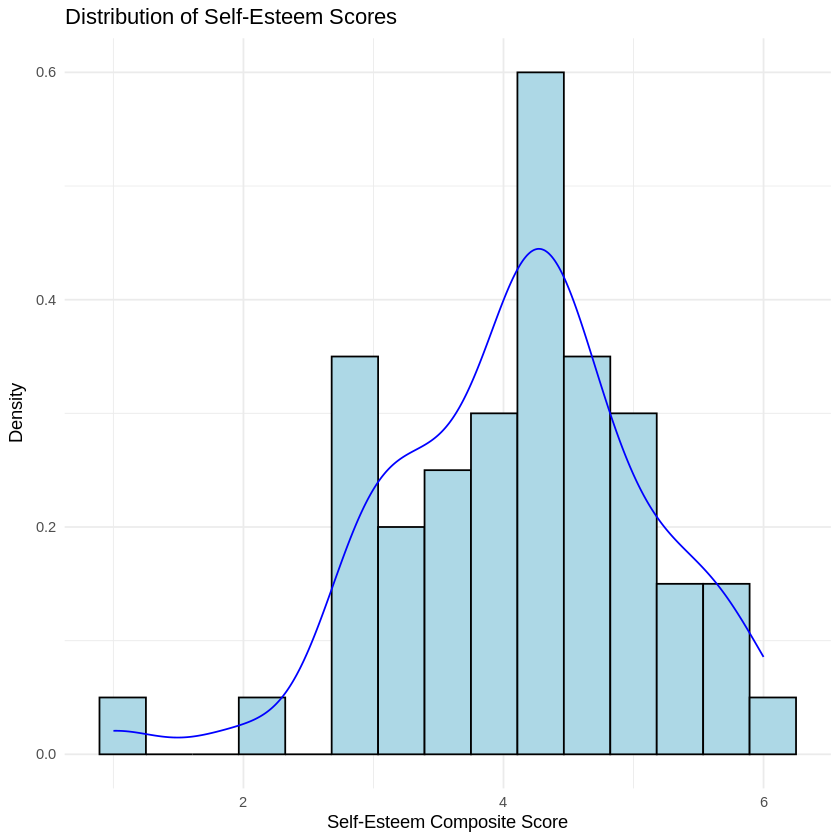

[1] "\n\n--- 3. Correlation Analysis ---"
[1] "Formula for Pearson's r: r = Σ((xi - x̄)(yi - ȳ)) / sqrt(Σ(xi - x̄)² * Σ(yi - ȳ)²)"
[1] "\nPearson Correlation Matrix:"
               self_esteem demandingness responsiveness
self_esteem      1.0000000    -0.1091743      0.2062439
demandingness   -0.1091743     1.0000000     -0.6050485
responsiveness   0.2062439    -0.6050485      1.0000000


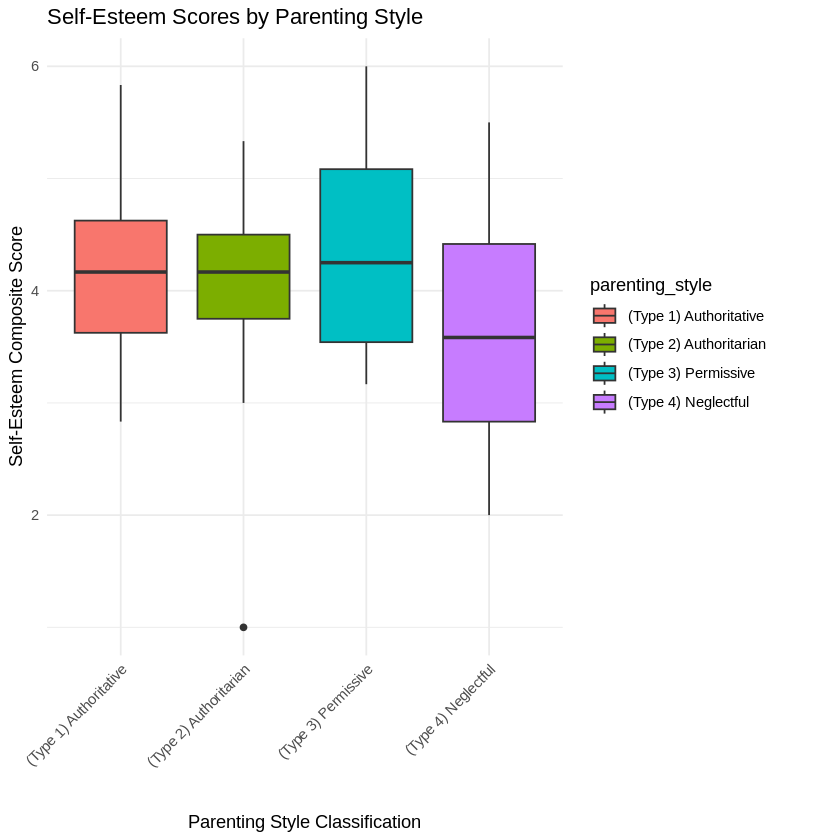

[1] "\n\n--- 4. Analysis of Variance (ANOVA) ---"
[1] "\n--- 4a. One-Way ANOVA ---"
[1] "\nOne-Way ANOVA Table:"
                Df Sum Sq Mean Sq F value Pr(>F)
parenting_style  3   3.27  1.0916   1.149  0.338
Residuals       52  49.41  0.9501               
[1] "\nConclusion: The differences are not statistically significant (p >= 0.05)."
[1] "\n\n--- 4b. Two-Way ANOVA ---"
[1] "\nTwo-Way ANOVA Table:"
                            Df Sum Sq Mean Sq F value Pr(>F)  
demand_level                 1   0.02   0.024   0.026 0.8734  
response_level               1   3.33   3.327   3.510 0.0666 .
demand_level:response_level  1   0.03   0.031   0.033 0.8572  
Residuals                   52  49.30   0.948                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
[1] "\n\n--- 5. Multiple Regression Analysis ---"
[1] "\nMultiple Regression Model Summary:"

Call:
lm(formula = self_esteem ~ demandingness + responsiveness, data = df)

Residuals:
     Min       1Q   Median  

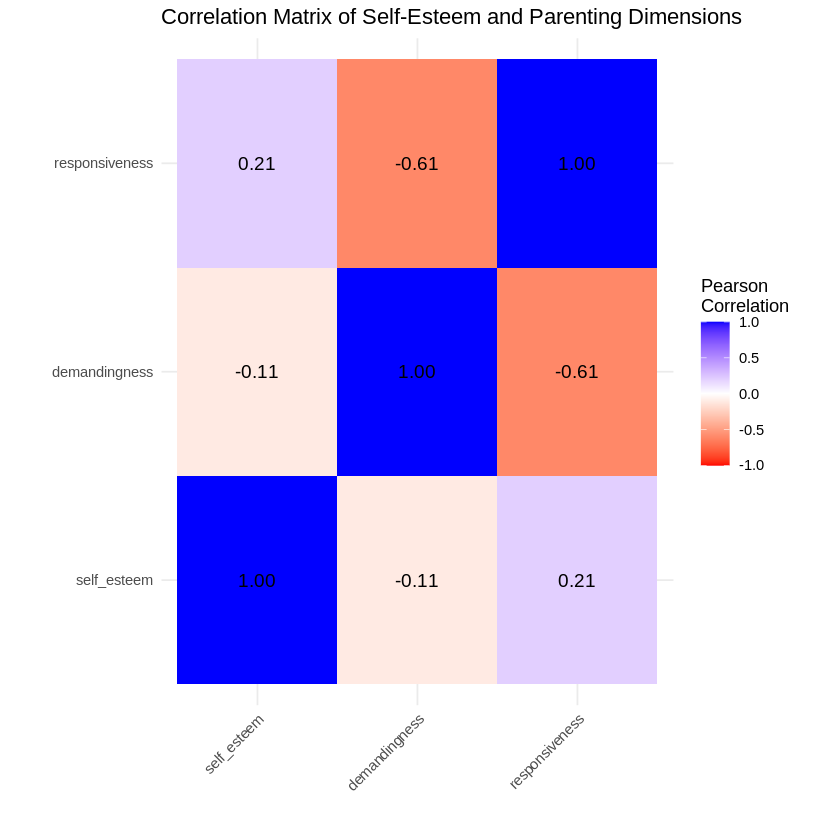

ERROR: Error in -attr(scaled_features, "scaled:center"): invalid argument to unary operator


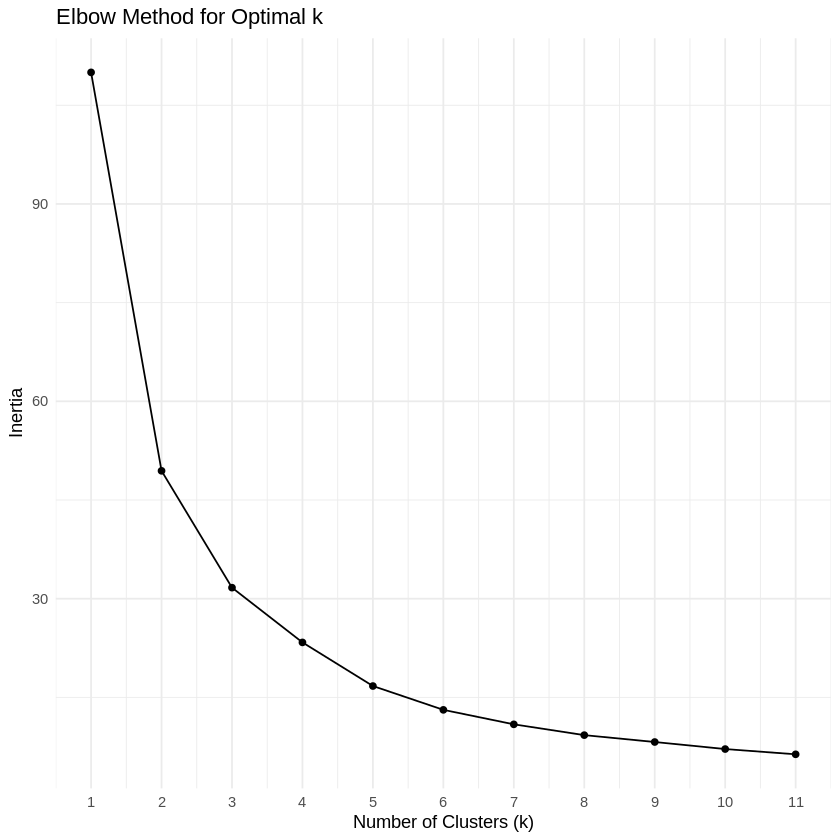

In [6]:
#
# ==============================================================================
# Comprehensive Statistical Analysis in R (Modularized & Enhanced)
# Creator: pkndev
# ==============================================================================
# This script provides a complete, function-based workflow for conducting
# various statistical analyses on the parenting style and self-esteem dataset.
# It now includes a new function that performs a t-test and uses the Gemini API
# to generate a professional, LaTeX-formatted interpretation of the results.
#
# Instructions for Google Colab with an R kernel:
# 1. Create a new Colab notebook and change the runtime to R (Runtime -> Change runtime type).
# 2. In a separate code cell at the top of your notebook, paste and run the following Python code to access your secret:
#
#    # --- START OF PYTHON CODE ---
#    from google.colab import userdata
#    import os
#    os.environ['GOOGLE_API_KEY'] = userdata.get('GOOGLE_API_KEY')
#    # --- END OF PYTHON CODE ---
#
#    This will securely load your API key as an environment variable for the R session.
# 3. Copy and paste this entire R code block into a single cell and run it.
# 4. You will be prompted to authorize Colab to access your Google Drive.
# 5. The script will then automatically access your Google Sheet and perform all the analyses.

# ------------------------------------------------------------------------------
# 0. LIBRARY IMPORTS
# ------------------------------------------------------------------------------

# Install and load necessary packages
if (!require(tidyverse)) install.packages("tidyverse", repos = "http://cran.us.r-project.org")
if (!require(googlesheets4)) install.packages("googlesheets4", repos = "http://cran.us.r-project.org")
if (!require(googledrive)) install.packages("googledrive", repos = "http://cran.us.r-project.org")
if (!require(stats)) install.packages("stats", repos = "http://cran.us.r-project.org")
if (!require(jsonlite)) install.packages("jsonlite", repos = "http://cran.us.r-project.org")
if (!require(httr)) install.packages("httr", repos = "http://cran.us.r-project.org")

library(tidyverse)
library(googlesheets4)
library(googledrive)
library(stats)
library(jsonlite)
library(httr)

# --- Google Colab Forms ---
# The following variables are configured to be used with Colab's interactive forms.
#@title Data Source Configuration
#@param gdrive_url URL of the Google Sheet containing the data.
#@param sheet_name The name of the sheet tab.
#@param data_range The cell range to read (e.g., "A1:E57").

# Set default values for convenience
gdrive_url <- "https://docs.google.com/spreadsheets/d/1c9XSUyKeofwqwHRwj8G-CPZv7mdxPYH4E1HEG7rUFCw/edit" #@param {type:"string"}
sheet_name <- "bmns_tab" #@param {type:"string"}
data_range <- "A1:E57" #@param {type:"string"}

# ------------------------------------------------------------------------------
# 1. DATA LOADING AND PREPARATION FUNCTION
# ------------------------------------------------------------------------------
pkndev_load_and_prep_data <- function(gdrive_path, sheet_name, data_range) {
  #' Connects to Google Drive, loads, cleans, and prepares the dataset.
  #' @param gdrive_path The full path of the Google Sheet in Google Drive.
  #' @param sheet_name The name of the sheet tab.
  #' @param data_range The cell range to read (e.g., "A1:E57").
  #' @return A cleaned and prepared data frame, or NULL on error.

  tryCatch({
    # Use the same token from googledrive for googlesheets4
    gs4_auth(token = drive_token())

    print("--- 1. Setup and Authentication ---")
    print("Authentication successful.")

    # Open the spreadsheet and load data
    df <- read_sheet(gdrive_path, sheet = sheet_name, range = data_range)
    print("Google Sheet data loaded successfully.")

    # --- Data Cleaning and Type Conversion ---
    df_clean <- df %>%
      rename(
        participant_num = `Participant num`,
        self_esteem = `Self-Esteem Composite Score (Average)`,
        parenting_style = `Parenting Style Classification`,
        demandingness = `Parental Demandingness`,
        responsiveness = `Parental Responsiveness`
      ) %>%
      mutate(across(c(self_esteem, demandingness, responsiveness), as.numeric)) %>%
      drop_na(self_esteem, demandingness, responsiveness)

    print("\nData Preparation Complete.")
    print("Cleaned DataFrame head:")
    print(head(df_clean))
    return(df_clean)

  }, error = function(e) {
    if (grepl("Spreadsheet not found", e$message)) {
      print(paste("ERROR: Spreadsheet not found at path:", gdrive_path))
    } else {
      print(paste("An unexpected error occurred during data loading:", e$message))
    }
    return(NULL)
  })
}

# ------------------------------------------------------------------------------
# 2. DESCRIPTIVE ANALYSIS FUNCTION
# ------------------------------------------------------------------------------
pkndev_descriptive_analysis <- function(df) {
  #' Performs and visualizes descriptive and summary statistics.
  #' @param df The cleaned data frame.

  print("\n\n--- 2. Descriptive and Summary Statistics ---")
  numeric_cols <- c('self_esteem', 'demandingness', 'responsiveness')

  print("\nOverall Descriptive Statistics for Numerical Columns:")
  print(summary(df[numeric_cols]))

  print("\nDescriptive Statistics by Parenting Style:")
  print(df %>%
          group_by(parenting_style) %>%
          summarise(across(all_of(numeric_cols), list(mean = mean, sd = sd), .names = "{.col}_{.fn}")))

  print("\nFrequency of Each Parenting Style:")
  print(table(df$parenting_style))

  # Plotting with ggplot2
  ggplot(df, aes(x = self_esteem)) +
    geom_histogram(bins = 15, aes(y = after_stat(density)), fill = "lightblue", color = "black") +
    geom_density(color = "blue") +
    labs(title = 'Distribution of Self-Esteem Scores',
         x = 'Self-Esteem Composite Score',
         y = 'Density') +
    theme_minimal()
  print(last_plot())

  ggplot(df, aes(x = parenting_style, y = self_esteem)) +
    geom_boxplot(aes(fill = parenting_style)) +
    labs(title = 'Self-Esteem Scores by Parenting Style',
         x = 'Parenting Style Classification',
         y = 'Self-Esteem Composite Score') +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1))
  print(last_plot())
}

# ------------------------------------------------------------------------------
# 3. CORRELATION ANALYSIS FUNCTION
# ------------------------------------------------------------------------------
pkndev_correlation_analysis <- function(df) {
  #' Performs and visualizes correlation analysis.
  #' @param df The cleaned data frame.

  print("\n\n--- 3. Correlation Analysis ---")
  print("Formula for Pearson's r: r = Σ((xi - x̄)(yi - ȳ)) / sqrt(Σ(xi - x̄)² * Σ(yi - ȳ)²)")
  numeric_cols <- c('self_esteem', 'demandingness', 'responsiveness')
  correlation_matrix <- cor(df[numeric_cols], method = "pearson")

  print("\nPearson Correlation Matrix:")
  print(correlation_matrix)

  # Heatmap visualization
  df_corr <- as.data.frame(as.table(correlation_matrix))
  ggplot(df_corr, aes(Var1, Var2, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = sprintf("%.2f", Freq)), color = "black", size = 4) +
    scale_fill_gradient2(low = "red", mid = "white", high = "blue",
                         midpoint = 0, limit = c(-1,1), name="Pearson\nCorrelation") +
    labs(title = 'Correlation Matrix of Self-Esteem and Parenting Dimensions',
         x = '', y = '') +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, vjust = 1))
  print(last_plot())
}

# ------------------------------------------------------------------------------
# 4. ANOVA FUNCTION
# ------------------------------------------------------------------------------
pkndev_anova_analysis <- function(df) {
  #' Performs One-Way and Two-Way ANOVA.
  #' @param df The cleaned data frame.

  print("\n\n--- 4. Analysis of Variance (ANOVA) ---")
  # --- One-Way ANOVA ---
  print("\n--- 4a. One-Way ANOVA ---")
  aov_one_way <- aov(self_esteem ~ parenting_style, data = df)
  print("\nOne-Way ANOVA Table:")
  print(summary(aov_one_way))

  p_value_one_way <- summary(aov_one_way)[[1]]$`Pr(>F)`[1]
  if (p_value_one_way < 0.05) {
    print("\nConclusion: The differences are statistically significant (p < 0.05).")
    tukey_hsd <- TukeyHSD(aov_one_way)
    print("\n--- Post-Hoc Analysis: Tukey's HSD Test ---")
    print(tukey_hsd)
  } else {
    print("\nConclusion: The differences are not statistically significant (p >= 0.05).")
  }

  # --- Two-Way ANOVA ---
  print("\n\n--- 4b. Two-Way ANOVA ---")
  df_two_way <- df %>%
    mutate(
      demand_level = ntile(demandingness, 2),
      response_level = ntile(responsiveness, 2)
    ) %>%
    mutate(
      demand_level = factor(demand_level, levels = c(1, 2), labels = c('Low_Demand', 'High_Demand')),
      response_level = factor(response_level, levels = c(1, 2), labels = c('Low_Response', 'High_Response'))
    )

  aov_two_way <- aov(self_esteem ~ demand_level * response_level, data = df_two_way)
  print("\nTwo-Way ANOVA Table:")
  print(summary(aov_two_way))
}

# ------------------------------------------------------------------------------
# 5. MULTIPLE REGRESSION FUNCTION
# ------------------------------------------------------------------------------
pkndev_regression_analysis <- function(df) {
  #' Performs multiple linear regression analysis.
  #' @param df The cleaned data frame.

  print("\n\n--- 5. Multiple Regression Analysis ---")
  model_regression <- lm(self_esteem ~ demandingness + responsiveness, data = df)
  print("\nMultiple Regression Model Summary:")
  print(summary(model_regression))
}

# ------------------------------------------------------------------------------
# 6. MANOVA FUNCTION
# ------------------------------------------------------------------------------
pkndev_manova_analysis <- function(df) {
  #' Performs Multivariate Analysis of Variance (MANOVA).
  #' @param df The cleaned data frame.

  print("\n\n--- 6. Multivariate Analysis of Variance (MANOVA) ---")
  manova_model <- manova(cbind(demandingness, responsiveness) ~ parenting_style, data = df)
  print("\nMANOVA Test Results:")
  print(summary(manova_model))
}

# ------------------------------------------------------------------------------
# 7. CLUSTER ANALYSIS FUNCTION
# ------------------------------------------------------------------------------
pkndev_cluster_analysis <- function(df) {
  #' Performs K-Means cluster analysis.
  #' @param df The cleaned data frame.

  print("\n\n--- 7. Cluster Analysis (K-Means) ---")
  features <- df[c('demandingness', 'responsiveness')]
  scaled_features <- as.data.frame(scale(features))

  # Elbow Method
  inertia <- map_dbl(1:11, function(k) {
    kmeans(scaled_features, centers = k, nstart = 25)$tot.withinss
  })

  plot_df <- data.frame(k = 1:11, inertia = inertia)
  ggplot(plot_df, aes(x = k, y = inertia)) +
    geom_point() +
    geom_line() +
    labs(title = 'Elbow Method for Optimal k',
         x = 'Number of Clusters (k)',
         y = 'Inertia') +
    theme_minimal() +
    scale_x_continuous(breaks = 1:11)
  print(last_plot())

  # Fit and visualize clusters
  optimal_k <- 4
  kmeans_result <- kmeans(scaled_features, centers = optimal_k, nstart = 25)
  df$cluster <- as.factor(kmeans_result$cluster)

  centroids <- as.data.frame(scale(kmeans_result$centers,
                                   center = -attr(scaled_features, "scaled:center"),
                                   scale = 1/attr(scaled_features, "scaled:scale")))

  ggplot(df, aes(x = demandingness, y = responsiveness, color = cluster)) +
    geom_point(alpha = 0.8) +
    geom_point(data = centroids, aes(x = demandingness, y = responsiveness),
               shape = "X", size = 10, color = "red") +
    labs(title = 'K-Means Clustering of Participants') +
    theme_minimal() +
    guides(color = guide_legend(override.aes = list(size = 5)))
  print(last_plot())

  print("\nInterpreting the Clusters (Mean values for each cluster):")
  print(df %>%
          group_by(cluster) %>%
          summarise(across(c(demandingness, responsiveness, self_esteem), mean)))
}

# ------------------------------------------------------------------------------
# 8. GEMINI API INTEGRATION FUNCTION
# ------------------------------------------------------------------------------
pkndev_generate_interpretation <- function(stats_results, analysis_type) {
  #' Generates a professional, academic interpretation of statistical results
  #' in LaTeX format using the Gemini API.
  #' @param stats_results A list containing statistical results.
  #' @param analysis_type The type of analysis performed.
  #' @return The generated LaTeX-formatted interpretation string.

  prompt <- paste0(
    "You are an academic tutor helping a student write a statistical analysis section for a paper. The student is an undergraduate at a college. Their paper is written in APA (7th edition) style.\n\n",
    "The student has conducted a ", analysis_type, " test. Please provide a clear, concise, and professional interpretation of the results, suitable for the discussion section of a paper. Explain what the results mean and state the conclusion regarding the null hypothesis.\n\n",
    "Here are the statistical results:\n",
    "- Test Type: ", analysis_type, "\n",
    "- Calculated t-statistic: ", sprintf("%.4f", stats_results$t_value), "\n",
    "- Degrees of Freedom (df): ", sprintf("%.2f", stats_results$df), "\n",
    "- p-value: ", sprintf("%.4f", stats_results$p_value), "\n",
    "- Group A Mean: ", sprintf("%.4f", stats_results$mean_a), "\n",
    "- Group B Mean: ", sprintf("%.4f", stats_results$mean_b), "\n",
    "- Null Hypothesis ($H_0$): There is no significant difference between the means of Group A and Group B.\n",
    "- Alternative Hypothesis ($H_a$): There is a significant difference between the means of Group A and Group B.\n\n",
    "Please structure your response with a brief introductory sentence and then a clear statement on whether to reject the null hypothesis and why. Ensure the language is neutral, academic, and avoids first-person pronouns. Keep it concise, around 150-200 words, and use APA 7th edition formatting for any statistical notation. All mathematical notation should be in LaTeX format using $ or $$ delimiters."
  )

  # Retrieve API key from environment variable
  api_key <- Sys.getenv("GOOGLE_API_KEY")
  if (api_key == "") {
    return("Error: GOOGLE_API_KEY environment variable not found. Please ensure it's set in a Python cell at the start of your notebook.")
  }

  api_url_with_key <- paste0("https://generativelanguage.googleapis.com/v1beta/models/gemini-2.5-flash-preview-05-20:generateContent?key=", api_key)

  payload <- list(
    contents = list(
      list(
        role = "user",
        parts = list(
          list(text = prompt)
        )
      )
    )
  )

  headers <- c('Content-Type' = 'application/json')

  for (i in 1:5) {
    tryCatch({
      response <- POST(url = api_url_with_key, body = toJSON(payload, auto_unbox = TRUE), add_headers(.headers = headers), encode = "json")
      stopifnot(response$status_code == 200)
      data <- fromJSON(content(response, "text"))
      if ("candidates" %in% names(data) && length(data$candidates) > 0) {
        return(data$candidates[[1]]$content$parts[[1]]$text)
      } else {
        return("Failed to get interpretation from API.")
      }
    }, error = function(e) {
      message(paste0("Request failed: ", e$message, ". Retrying in ", 2^(i-1), " seconds..."))
      Sys.sleep(2^(i-1))
    })
  }
  return("Failed to get interpretation from API after multiple retries.")
}

# ------------------------------------------------------------------------------
# 9. T-TEST ANALYSIS FUNCTION (NEW)
# ------------------------------------------------------------------------------
pkndev_ttest_analysis <- function(df) {
  #' Performs an independent samples t-test and generates a LaTeX-formatted
  #' interpretation of the results using the Gemini API.
  #' @param df The cleaned data frame.

  print("\n\n--- 9. Independent Samples T-Test Analysis ---")

  # Create a dichotomous variable for demandingness
  demand_median <- median(df$demandingness, na.rm = TRUE)
  df_ttest <- df %>%
    mutate(
      demand_group = ifelse(demandingness >= demand_median, 'High_Demand', 'Low_Demand')
    )

  # Get the two groups of data
  group_high_demand <- df_ttest %>% filter(demand_group == 'High_Demand') %>% pull(self_esteem)
  group_low_demand <- df_ttest %>% filter(demand_group == 'Low_Demand') %>% pull(self_esteem)

  if (length(group_high_demand) == 0 || length(group_low_demand) == 0) {
    print("Error: Not enough data in one or both groups to perform a t-test.")
    return(invisible(NULL))
  }

  # Perform the t-test (Welch's t-test)
  ttest_result <- t.test(group_high_demand, group_low_demand, var.equal = FALSE)

  stats_results <- list(
    't_value' = ttest_result$statistic,
    'p_value' = ttest_result$p.value,
    'df' = ttest_result$parameter,
    'mean_a' = mean(group_high_demand),
    'mean_b' = mean(group_low_demand)
  )

  # Generate interpretation from Gemini API
  print("Generating academic interpretation for the t-test... This may take a moment.")
  interpretation <- pkndev_generate_interpretation(stats_results, "Independent Samples T-test")

  if (startsWith(interpretation, "Error:")) {
      print(interpretation)
      return(invisible(NULL))
  }

  # Print the raw LaTeX output
  cat("\n================================================================================\n")
  cat("RAW LATEX OUTPUT (Copy and paste this into your LaTeX editor):\n")
  cat("================================================================================\n")

  latex_output <- paste0(
    "\\section*{T-Test Results}\n\n",
    "Test Type: Independent Two-Sample T-test\n\n",
    "\\subsection*{Statistical Results}\n",
    "Calculated t-statistic: $t(", sprintf("%.2f", stats_results$df), ") = ", sprintf("%.4f", stats_results$t_value), "$\n",
    "p-value: $p = ", sprintf("%.4f", stats_results$p_value), "$\n",
    "High Demandingness Group Mean: $\\bar{x}_{High} = ", sprintf("%.4f", stats_results$mean_a), "$\n",
    "Low Demandingness Group Mean: $\\bar{x}_{Low} = ", sprintf("%.4f", stats_results$mean_b), "$\n\n",
    "\\subsection*{Evaluation, Interpretation, and Discussion}\n",
    interpretation
  )

  cat(latex_output)
  cat("\n================================================================================\n")
}


# ------------------------------------------------------------------------------
# 10. GOOGLE DRIVE MOUNTING FUNCTION
# ------------------------------------------------------------------------------
pkndev_mount_gdrive <- function() {
  #' Mounts Google Drive to the Colab environment.
  #' This function handles the authentication flow to gain file-level access
  #' to the user's Google Drive.

  tryCatch({
    # Check if a token for googledrive already exists
    if (!googledrive::drive_has_token()) {
      # Authenticate with a broad scope to cover Drive and Sheets access
      googledrive::drive_auth(scopes = "https://www.googleapis.com/auth/drive")
    }
    print("Google Drive has been successfully mounted.")
  }, error = function(e) {
    print(paste("An error occurred while mounting Google Drive:", e$message))
    print("Please check your network connection or try to authenticate manually.")
  })
}


# ------------------------------------------------------------------------------
# 11. MAIN ORCHESTRATION FUNCTION
# ------------------------------------------------------------------------------
pkndev_main <- function(gdrive_url, sheet_name, data_range) {
  #' Main function to orchestrate the entire analysis pipeline.
  #' @param gdrive_url The URL of the Google Sheet.
  #' @param sheet_name The name of the sheet tab.
  #' @param data_range The cell range to read.

  # Mount Google Drive at the start of the script
  pkndev_mount_gdrive()

  # 1. Load and prepare the data
  df_clean <- pkndev_load_and_prep_data(gdrive_url, sheet_name, data_range)

  # 2. Proceed with analysis only if data was loaded successfully
  if (!is.null(df_clean) && nrow(df_clean) > 0) {
    pkndev_descriptive_analysis(df_clean)
    pkndev_correlation_analysis(df_clean)
    pkndev_anova_analysis(df_clean)
    pkndev_regression_analysis(df_clean)
    pkndev_manova_analysis(df_clean)
    pkndev_cluster_analysis(df_clean)
    pkndev_ttest_analysis(df_clean)
    print("\n\n--- Analysis Complete ---")
  } else {
    print("\n\n--- Analysis Halted: Data could not be loaded or is empty. ---")
  }
}

# ------------------------------------------------------------------------------
# 12. SCRIPT EXECUTION
# ------------------------------------------------------------------------------
pkndev_main(gdrive_url, sheet_name, data_range)
